Logistic Regression and Vector Semantics

1. Create term-document and word-word matrix. Visualize term-document and word-word matrixes in MATRIX form (20%)

2. Calculate tf-IDF features (10%)

3. Calculate PMI featires (10%)

4. Apply Logistic Regression for classification of text based on tf-IDF and PMI features and compare with results of Naive Bayes method. (30%)

5. Find 10 most similar words for the given word by using Cosine similarity. (10%)



In [14]:
import nltk
import os
import re
import csv
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer
from sklearn.feature_selection import mutual_info_classif
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
from scipy.sparse import csr_matrix, lil_matrix
from sklearn.metrics import classification_report

from nltk.probability import FreqDist
from nltk.collocations import BigramCollocationFinder, BigramAssocMeasures


In [15]:
def load_stopwords(stopwords_file):
    with open(stopwords_file, 'r', encoding='utf-8') as f:
        stopwords = [word.strip() for word in f.readlines()]
    return stopwords

def tokenize_document(document):
    words = re.split(r'\W+', document)
    words = [word.strip() for word in words if len(word.strip()) > 1]
    return words

def remove_stopwords(text, stopwords):
    words = tokenize_document(text)
    filtered_words = [word for word in words if word.lower() not in stopwords]
    return ' '.join(filtered_words)

def remove_stopwords_from_csv(input_csv, output_csv, stopwords):
    with open(input_csv, 'r', encoding='utf-8') as csv_input:
        reader = csv.DictReader(csv_input)
        fieldnames = reader.fieldnames

        with open(output_csv, 'w', encoding='utf-8', newline='') as csv_output:
            writer = csv.DictWriter(csv_output, fieldnames=fieldnames)
            writer.writeheader()

            for row in reader:
                row['content'] = remove_stopwords(row['content'], stopwords)
                writer.writerow(row)

stopwords_file = 'azerbaijani.txt'

stopwords_az = load_stopwords(stopwords_file)

input_csv = 'oxu_az_500_000.csv'

output_csv = 'news.csv'

remove_stopwords_from_csv(input_csv, output_csv, stopwords_az)

print("Stopwords removed from the CSV file and saved to 'news_without_stopwords.csv'")


Stopwords removed from the CSV file and saved to 'news_without_stopwords.csv'


In [16]:
df = pd.read_csv("news.csv")
all_text = " ".join(df['content'])

df.head(10)

,id,host,link,title,category,subcategory,content,main_image,content_image,content_video,date_time,content_date_time,type,status,created_at,tags,sentiment,shortened_link,last_updated
0,1201058,oxu.az,https://oxu.az//world/776398,Mərakeşdə yeni doğulmuş körpə dağıntılar altın...,Dünya,\N,Mərakeşdə dağıntılar altında yeni doğulmuş kör...,https://cdn.oxu.az/uploads/W1siZiIsIjIwMjMvMDk...,NaN,NaN,2023-09-12 21:58:00+02,"12 Sen, 2023 21:58",\N,\N,2023-09-12 22:00:52+02,NaN,-1,oxu.az//world/776398,2023-09-12 20:03:15.407213+02
1,1068546,oxu.az,https://oxu.az//world/770679,“İdalia” tropik qasırğası Kubanın qərb əyaləti...,Dünya,\N,İdalia tropik qasırğası Kubanın qərb əyalətini...,https://cdn.oxu.az/uploads/W1siZiIsIjIwMjMvMDg...,https://cdn.oxu.az/uploads/W1siZiIsIjIwMjMvMDg...,NaN,2023-08-30 08:05:00+02,"30 Avq, 2023 08:05",\N,\N,2023-08-30 09:01:41+02,NaN,1,oxu.az//world/770679,\N
2,1799810,oxu.az,https://oxu.az//politics/797656,Prezident İlham Əliyev Pakistan Silahlı Qüvvəl...,Siyasət,\N,WhatsApp kanalımıza abunə ola bilərsinizAzərba...,https://cdn.oxu.az/uploads/W1siZiIsIjIwMjMvMTE...,NaN,NaN,2023-11-01 11:01:00+01,"1 Noy, 2023 11:01",\N,\N,2023-11-01 11:01:54+01,NaN,0,oxu.az//politics/797656,2023-11-01 09:00:05.058095+01
3,1068544,oxu.az,https://oxu.az//society/770772,Dağlıq ərazidə itkin düşmüş şəxslər tapılıblar,Cəmiyyət,\N,Dağlıq ərazidə itkin düşmüş şəxslər tapılıblar...,https://cdn.oxu.az/uploads/W1siZiIsIjIwMjMvMDg...,NaN,NaN,2023-08-30 08:32:00+02,"30 Avq, 2023 08:32",\N,\N,2023-08-30 09:01:40+02,NaN,1,oxu.az//society/770772,\N
4,1068545,oxu.az,https://oxu.az//war/770771,Bakıdan erməniəsilli şəxslərə 40 ton humanitar...,Cəmiyyət,\N,gündür Azərbaycan Qızıl Aypara Cəmiyyəti tərəf...,https://cdn.oxu.az/uploads/W1siZiIsIjIwMjMvMDg...,https://cdn.oxu.az/uploads/W1siZiIsIjIwMjMvMDg...,NaN,2023-08-30 08:27:00+02,"30 Avq, 2023 08:27",\N,\N,2023-08-30 09:01:41+02,NaN,-1,oxu.az//war/770771,\N
5,1103828,oxu.az,https://oxu.az//society/772124,Asan pul qazanmaq istəyənlərin düşdüyü tələ - ...,Cəmiyyət,\N,Son vaxtlar TikTok Telegram digər sosial şəbək...,https://cdn.oxu.az/uploads/W1siZiIsIjIwMjMvMDk...,https://cdn.oxu.az/uploads/W1siZiIsIjIwMjMvMDk...,NaN,2023-09-02 14:00:00+02,"2 Sen, 2023 14:00",\N,\N,2023-09-02 14:01:18+02,NaN,-1,oxu.az//society/772124,\N
6,1097485,oxu.az,https://oxu.az//war/771962,"“Təxribatlara davam edərsə, Ermənistanı yenidə...",Siyasət,\N,Təxribatlara davam edərsə Ermənistanı yenidən ...,https://cdn.oxu.az/uploads/W1siZiIsIjIwMjMvMDk...,https://cdn.oxu.az/uploads/W1siZiIsIjIwMjMvMDk...,NaN,2023-09-01 18:00:00+02,"1 Sen, 2023 18:00",\N,\N,2023-09-01 18:01:02+02,NaN,1,oxu.az//war/771962,\N
7,1155999,oxu.az,https://oxu.az//politics/774518,Ermənistan növbəti təxribata hazırlaşır - VİDEO,Siyasət,\N,Ermənistan tərəfi növbəti təxribata hazırlaşır...,https://cdn.oxu.az/uploads/W1siZiIsIjIwMjMvMDk...,NaN,NaN,2023-09-07 23:52:00+02,"7 Sen, 2023 23:52",\N,\N,2023-09-08 00:00:58+02,NaN,1,oxu.az//politics/774518,2023-09-07 22:03:47.315215+02
8,1334656,oxu.az,https://oxu.az//politics/780794,Azərbaycan və Rusiya XİN başçılarının görüşü olub,Siyasət,\N,Azərbaycanın xarici işlər naziri Ceyhun Bayram...,https://cdn.oxu.az/uploads/W1siZiIsIjIwMjMvMDk...,NaN,NaN,2023-09-22 20:57:00+02,"22 Sen, 2023 20:57",\N,\N,2023-09-22 21:00:19+02,NaN,1,oxu.az//politics/780794,2023-09-22 19:01:35.662219+02
9,1088511,oxu.az,https://oxu.az//world/771526,Barnaulda sirk gimnastı akrobatik nömrə zamanı...,Dünya,\N,Rusiyanın Barnaul şəhərində sirk gimnastı çıxı...,https://cdn.oxu.az/uploads/W1siZiIsIjIwMjMvMDg...,NaN,NaN,2023-08-31 22:00:00+02,"31 Avq, 2023 22:00",\N,\N,2023-08-31 22:01:14+02,NaN,1,oxu.az//world/771526,\N


In [17]:

def tokenize_document(document):
    words = re.split(r'\W+', document)
    words = [word.strip() for word in words if len(word.strip()) > 1]
    return words


def tokenize_document2(document):
    words = [word.strip('“”“!"#&\'()*+,-./:;<=>?@[\\]^_`{|}~') for word in document.split()]
    words = [word for word in words if word and not any(char.isdigit() for char in word)]  # Filter out tokens containing digits
    return words

def remove_digits_from_dataframe(df):
    df['content'] = df['content'].str.replace('\d+', '')
    return df

df = remove_digits_from_dataframe(df)

df['tokens'] = df['content'].apply(tokenize_document)
docs = df.loc[:, ['id', 'content', 'category']]
docs.head(10)

,id,content,category
0,1201058,Mərakeşdə dağıntılar altında yeni doğulmuş kör...,Dünya
1,1068546,İdalia tropik qasırğası Kubanın qərb əyalətini...,Dünya
2,1799810,WhatsApp kanalımıza abunə ola bilərsinizAzərba...,Siyasət
3,1068544,Dağlıq ərazidə itkin düşmüş şəxslər tapılıblar...,Cəmiyyət
4,1068545,gündür Azərbaycan Qızıl Aypara Cəmiyyəti tərəf...,Cəmiyyət
5,1103828,Son vaxtlar TikTok Telegram digər sosial şəbək...,Cəmiyyət
6,1097485,Təxribatlara davam edərsə Ermənistanı yenidən ...,Siyasət
7,1155999,Ermənistan tərəfi növbəti təxribata hazırlaşır...,Siyasət
8,1334656,Azərbaycanın xarici işlər naziri Ceyhun Bayram...,Siyasət
9,1088511,Rusiyanın Barnaul şəhərində sirk gimnastı çıxı...,Dünya


# Task 1

## Term-document matrix

In [18]:
vect = CountVectorizer()  
vects = vect.fit_transform(docs.content)

print(vect.vocabulary_)

{'mərakeşdə': 60791, 'dağıntılar': 21680, 'altında': 4553, 'yeni': 107071, 'doğulmuş': 24316, 'körpə': 50135, 'tapılıb': 91893, 'güclü': 35347, 'zəlzələdən': 110656, 'gündə': 35878, 'aşkar': 10404, 'edilib': 27240, 'müvafiq': 58965, 'görüntülər': 34410, 'sosial': 86379, 'şəbəkələrdə': 117245, 'yayılıb': 106068, 'xilasedicilər': 103339, 'uşağı': 99786, 'həkimlərə': 39790, 'təhvil': 96318, 'veriblər': 100667, 'xatırladaq': 103094, 'son': 86181, 'rəqəmlərə': 81341, 'təbii': 95757, 'fəlakət': 32233, 'nəticəsində': 64533, 'minə': 56158, 'yaxın': 105781, 'insan': 42239, 'ölüb': 114113, 'dalia': 20613, 'tropik': 94507, 'qasırğası': 73084, 'kubanın': 49570, 'qərb': 78022, 'əyalətinin': 119985, 'əhalisinin': 118075, '60': 1736, 'ni': 62814, 'işıqsız': 44824, 'qoyub': 75414, 'ümumilikdə': 114922, 'rayonda': 78886, '570': 1683, 'mindən': 56017, 'yaşayır': 106707, 'qeyd': 74249, 'edək': 27490, 'fəlakətin': 32237, 'episentri': 28687, 'tampa': 91467, 'şəhərindən': 117421, 'florida': 31220, '500': 15

In [19]:
td = pd.DataFrame(vects.todense()).iloc[:9]  
td.columns = vect.get_feature_names_out()
term_document_matrix = td.T
term_document_matrix.columns = ['Doc '+str(i) for i in range(1, 10)]
term_document_matrix['total_count'] = term_document_matrix.sum(axis=1)

term_document_matrix = term_document_matrix.sort_values(by ='total_count',ascending=False)[:25] 

print(term_document_matrix.drop(columns=['total_count']))


             Doc 1  Doc 2  Doc 3  Doc 4  Doc 5  Doc 6  Doc 7  Doc 8  Doc 9
hərbi            0      0      0      0      0      0      7      1      0
azərbaycan       0      0      0      0      3      0      5      0      0
ermənistan       0      0      0      0      1      0      3      1      0
bağlı            0      0      0      0      2      3      0      0      0
barədə           0      0      1      1      1      1      0      0      1
sosial           1      0      0      0      0      3      0      1      0
digər            0      0      0      1      0      2      1      1      0
ağdam            0      0      0      0      4      0      0      0      0
ordusu           0      0      0      0      0      0      4      0      0
şəbəkələrdə      1      0      0      0      0      2      0      1      0
son              1      0      0      0      0      2      0      0      1
xankəndi         0      0      0      0      4      0      0      0      0
qeyd             0      1

<Axes: >

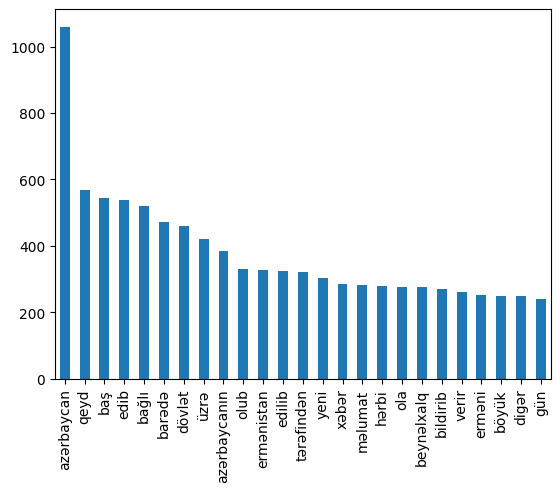

In [9]:
td = pd.DataFrame(vects.todense()).iloc[:1000]  
td.columns = vect.get_feature_names_out()
term_document_matrix = td.T
term_document_matrix.columns = ['Doc '+ str(i) for i in range(1, 1001)]
term_document_matrix['total_count'] = term_document_matrix.sum(axis=1)

term_document_matrix = term_document_matrix.sort_values(by ='total_count',ascending=False)[:25] 

term_document_matrix['total_count'].plot.bar()


In [20]:
docs = docs[:10] 


## Word-word matrix

In [21]:
merged_text = ' '.join(docs['content'])

vect = CountVectorizer()
vect.fit_transform([merged_text])

feature_names = vect.get_feature_names_out()

word_to_word_matrix = vect.transform([merged_text]).T.dot(vect.transform([merged_text]))

word_to_word_matrix_sparse = csr_matrix(word_to_word_matrix)

word_to_word_matrix_df = pd.DataFrame.sparse.from_spmatrix(word_to_word_matrix_sparse, index=feature_names, columns=feature_names)

word_to_word_matrix_df_sliced = word_to_word_matrix_df.iloc[200:, 200:]

print(word_to_word_matrix_df_sliced)


            həftədə  həkimlər  həkimlərə  hələ  həmkarı  hərbi  hərəkət  \
həftədə           1         1          1     1        1      8        1   
həkimlər          1         1          1     1        1      8        1   
həkimlərə         1         1          1     1        1      8        1   
hələ              1         1          1     1        1      8        1   
həmkarı           1         1          1     1        1      8        1   
...             ...       ...        ...   ...      ...    ...      ...   
ərazisində        2         2          2     2        2     16        2   
əraziyə           1         1          1     1        1      8        1   
əsas              3         3          3     3        3     24        3   
ətraflı           1         1          1     1        1      8        1   
əyalətinin        1         1          1     1        1      8        1   

            hətta  həyat  icazə  ...  əməliyyatların  əngəllər  ərazi  \
həftədə         1      1  

## Task 2:


### TF-IDF Features


In [22]:
tfidf_vectorizer = TfidfVectorizer()

tfidf_matrix = tfidf_vectorizer.fit_transform(docs['content'])

feature_names = tfidf_vectorizer.get_feature_names_out()

tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)

print(tfidf_df.iloc[:, 9:])


      abunə      adlı     adsız    adının  akrobatik     aktiv    alaraq  \
0  0.000000  0.000000  0.000000  0.000000   0.000000  0.000000  0.000000   
1  0.000000  0.000000  0.000000  0.000000   0.000000  0.000000  0.000000   
2  0.216793  0.000000  0.000000  0.000000   0.000000  0.000000  0.000000   
3  0.000000  0.000000  0.000000  0.000000   0.000000  0.000000  0.000000   
4  0.000000  0.000000  0.000000  0.000000   0.000000  0.000000  0.000000   
5  0.000000  0.070488  0.000000  0.070488   0.000000  0.000000  0.000000   
6  0.000000  0.000000  0.060248  0.000000   0.000000  0.060248  0.060248   
7  0.000000  0.000000  0.000000  0.000000   0.000000  0.000000  0.000000   
8  0.000000  0.000000  0.000000  0.000000   0.000000  0.000000  0.000000   
9  0.000000  0.000000  0.000000  0.000000   0.138088  0.000000  0.000000   

   aldadıldığını    altına   altında  ...  əməliyyatların  əngəllər     ərazi  \
0       0.000000  0.000000  0.189368  ...        0.000000  0.000000  0.000000   
1

In [23]:
tfidf_df.values.sum()

73.60796912197472

# Task3 

### PMI features

In [11]:
tokenized_docs = [tokenize_document2(doc.lower()) for doc in docs['content']]
tokenized_docs_flat = [token for sublist in tokenized_docs for token in sublist]

fdist = FreqDist(tokenized_docs_flat)

fdist = FreqDist(tokenized_docs_flat)


finder = BigramCollocationFinder.from_documents(tokenized_docs)

pmi_scores = finder.score_ngrams(BigramAssocMeasures().pmi)

pmi_scores_sorted = sorted(pmi_scores, key=lambda x: x[1], reverse=True)

for item in pmi_scores_sorted[:1000]:
    print(item[0][0], item[0][1])
    print(item[1])
    print()



adsız yüksəkliklər
9.581200581924957

adının açıqlanmasını
9.581200581924957

akrobatik nömrənin
9.581200581924957

altına götürüb
9.581200581924957

alındığı vurğulanıb
9.581200581924957

aparıblar onlara
9.581200581924957

araşdırma aparılır
9.581200581924957

araşdırılır vətəndaşların
9.581200581924957

asim muniri
9.581200581924957

aspektləri müzakirə
9.581200581924957

atəş sistemi
9.581200581924957

atəşə tutması
9.581200581924957

ayrılıb radələrində
9.581200581924957

azərbaycanda minlərlə
9.581200581924957

açdıqları bank
9.581200581924957

açıqlanmasını istəməyən
9.581200581924957

aşağı düşə
9.581200581924957

bakıdan yola
9.581200581924957

bank hesabları
9.581200581924957

batdı bildirilir
9.581200581924957

bayramov rusiyalı
9.581200581924957

baş verməsi
9.581200581924957

beyin silkələnməsi
9.581200581924957

bildiriblər vətəndaş
9.581200581924957

bilməyib tamaşaçıların
9.581200581924957

bilərsinizazərbaycan respublikasının
9.581200581924957

bioloji müxtəlifliyin
9.

## 4. Apply Logistic Regression for classification of text based on tf-IDF and PMI features and compare with results of Naive Bayes method. (30%)



In [13]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['category_encoded'] = label_encoder.fit_transform(df['category'])

print("Unique Encoded Categories:", df['category_encoded'].unique())


Unique Encoded Categories: [ 4  9  3  7  5 13 14  6  8 15  2 10 11 12  0  1]


In [9]:
X = df['content']
y = df['category']

tfidf_vectorizer = TfidfVectorizer(max_features=5000)  #  max_features 
X_tfidf = tfidf_vectorizer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg_pred = logreg.predict(X_test)

accuracy = accuracy_score(y_test, logreg_pred)
print("Logistic Regression Accuracy:", accuracy)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, logreg_pred))

nb = MultinomialNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)

accuracy_nb = accuracy_score(y_test, nb_pred)
print("\nNaive Bayes Accuracy:", accuracy_nb)
print("Naive Bayes Classification Report:")
print(classification_report(y_test, nb_pred))

Logistic Regression Accuracy: 0.8186195826645265
Logistic Regression Classification Report:
              precision    recall  f1-score   support

   Avto-Moto       0.00      0.00      0.00         2
  CinemaPlus       0.00      0.00      0.00         3
    Cəmiyyət       0.79      0.88      0.83       906
       Dünya       0.81      0.94      0.87       580
    Kriminal       0.50      0.04      0.08        49
     Maraqlı       0.60      0.19      0.29        32
    Müharibə       0.89      0.52      0.66        63
  Mədəniyyət       0.14      0.02      0.04        45
     Siyasət       0.82      0.85      0.83       851
      Turizm       0.00      0.00      0.00         8
         İKT       0.00      0.00      0.00        16
       İdman       0.97      0.93      0.95       344
İqtisadiyyat       0.75      0.65      0.70       171
  Şou-biznes       0.94      0.33      0.49        45

    accuracy                           0.82      3115
   macro avg       0.51      0.38      0.4

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_

In [12]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report


def calculate_pmi_features(text_data, labels, top_n=1000):
    count_vectorizer = CountVectorizer()
    X_count = count_vectorizer.fit_transform(text_data)

    class_counts = {}
    total_docs = len(text_data)
    pmi_scores = {}
    for label in labels.unique():
        class_mask = (labels == label)
        class_counts[label] = class_mask.sum()
        pmi_scores[label] = {}
        for word in count_vectorizer.get_feature_names_out():
            word_mask = count_vectorizer.vocabulary_.get(word, None)
            if word_mask is not None:
                word_count = X_count[class_mask][:, word_mask].sum()
                pmi = (word_count * total_docs) / (class_counts[label] * X_count[:, word_mask].sum())
                pmi_scores[label][word] = pmi
    
    top_pmi_features = {}
    for label in labels.unique():
        sorted_pmi = sorted(pmi_scores[label].items(), key=lambda x: x[1], reverse=True)[:top_n]
        top_pmi_features[label] = [word for word, _ in sorted_pmi]

    return top_pmi_features

top_pmi_features = calculate_pmi_features(X, y)

def transform_with_pmi(text_data, pmi_features):
    feature_matrix = []
    for doc in text_data:
        doc_features = []
        for label, features in pmi_features.items():
            feature_count = sum([doc.count(word) for word in features])
            doc_features.append(feature_count)
        feature_matrix.append(doc_features)
    return feature_matrix

X_pmi = transform_with_pmi(X, top_pmi_features)

X_train, X_test, y_train, y_test = train_test_split(X_pmi, y, test_size=0.2, random_state=42)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg_pred = logreg.predict(X_test)

accuracy = accuracy_score(y_test, logreg_pred)
print("Logistic Regression Accuracy with PMI features:", accuracy)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, logreg_pred))

nb = MultinomialNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)

accuracy_nb = accuracy_score(y_test, nb_pred)
print("\nNaive Bayes Accuracy with PMI features:", accuracy_nb)
print("Naive Bayes Classification Report:")
print(classification_report(y_test, nb_pred))


Logistic Regression Accuracy with PMI features: 0.434991974317817
Logistic Regression Classification Report:
              precision    recall  f1-score   support

   Avto-Moto       0.00      0.00      0.00         2
  CinemaPlus       0.00      0.00      0.00         3
    Cəmiyyət       0.44      0.61      0.51       906
       Dünya       0.33      0.23      0.27       580
    Kriminal       0.00      0.00      0.00        49
     Maraqlı       0.00      0.00      0.00        32
    Müharibə       0.58      0.30      0.40        63
  Mədəniyyət       0.03      0.04      0.04        45
     Siyasət       0.50      0.58      0.54       851
      Turizm       0.75      0.38      0.50         8
         İKT       0.67      0.12      0.21        16
       İdman       0.42      0.38      0.40       344
İqtisadiyyat       0.21      0.08      0.11       171
  Şou-biznes       1.00      0.02      0.04        45

    accuracy                           0.43      3115
   macro avg       0.35  

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_

In [15]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust max_features as needed
X_tfidf = tfidf_vectorizer.fit_transform(X)

# Calculate PMI Features
def calculate_pmi_features(text_data, labels, top_n=1000):
    count_vectorizer = CountVectorizer()
    X_count = count_vectorizer.fit_transform(text_data)

    class_counts = {}
    total_docs = len(text_data)
    pmi_scores = {}
    for label in labels.unique():
        class_mask = (labels == label)
        class_counts[label] = class_mask.sum()
        pmi_scores[label] = {}
        for word in count_vectorizer.get_feature_names_out():
            word_mask = count_vectorizer.vocabulary_.get(word, None)
            if word_mask is not None:
                word_count = X_count[class_mask][:, word_mask].sum()
                pmi = (word_count * total_docs) / (class_counts[label] * X_count[:, word_mask].sum())
                pmi_scores[label][word] = pmi
    
    top_pmi_features = {}
    for label in labels.unique():
        sorted_pmi = sorted(pmi_scores[label].items(), key=lambda x: x[1], reverse=True)[:top_n]
        top_pmi_features[label] = [word for word, _ in sorted_pmi]

    return top_pmi_features

top_pmi_features = calculate_pmi_features(X, y)

def combine_features(tfidf_matrix, pmi_features):
    combined_features = tfidf_matrix.copy()
    for label, features in pmi_features.items():
        for word in features:
            if word in tfidf_vectorizer.vocabulary_:
                word_index = tfidf_vectorizer.vocabulary_[word]
                combined_features[:, word_index] = combined_features[:, word_index] + 1
    return combined_features

from scipy.sparse import hstack

def combine_features(tfidf_matrix, pmi_features):
    combined_features = tfidf_matrix.copy()
    for label, features in pmi_features.items():
        pmi_indices = [tfidf_vectorizer.vocabulary_.get(word, -1) for word in features]
        pmi_indices = [i for i in pmi_indices if i != -1]  # Filter out words not present in TF-IDF
        pmi_values = [1] * len(pmi_indices)  # Set PMI values to 1
        pmi_row = [0] * len(pmi_indices)
        pmi_col = pmi_indices
        pmi_matrix = csr_matrix((pmi_values, (pmi_row, pmi_col)), shape=(tfidf_matrix.shape[0], len(tfidf_vectorizer.vocabulary_)))
        combined_features = hstack([combined_features, pmi_matrix])
    return combined_features


X_combined = combine_features(X_tfidf, top_pmi_features)

X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg_pred = logreg.predict(X_test)

accuracy = accuracy_score(y_test, logreg_pred)
print("Logistic Regression Accuracy with TF-IDF and PMI features:", accuracy)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, logreg_pred))

nb = MultinomialNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)

accuracy_nb = accuracy_score(y_test, nb_pred)
print("\nNaive Bayes Accuracy with TF-IDF and PMI features:", accuracy_nb)
print("Naive Bayes Classification Report:")
print(classification_report(y_test, nb_pred))


Logistic Regression Accuracy with TF-IDF and PMI features: 0.8186195826645265
Logistic Regression Classification Report:
              precision    recall  f1-score   support

   Avto-Moto       0.00      0.00      0.00         2
  CinemaPlus       0.00      0.00      0.00         3
    Cəmiyyət       0.79      0.88      0.83       906
       Dünya       0.81      0.94      0.87       580
    Kriminal       0.50      0.04      0.08        49
     Maraqlı       0.60      0.19      0.29        32
    Müharibə       0.89      0.52      0.66        63
  Mədəniyyət       0.14      0.02      0.04        45
     Siyasət       0.82      0.85      0.83       851
      Turizm       0.00      0.00      0.00         8
         İKT       0.00      0.00      0.00        16
       İdman       0.97      0.93      0.95       344
İqtisadiyyat       0.75      0.65      0.70       171
  Şou-biznes       0.94      0.33      0.49        45

    accuracy                           0.82      3115
   macro avg 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_

## 5. Find 10 most similar words for the given word by using Cosine similarity. (10%)


In [17]:
import re
import numpy as np
from gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity


def tokenize_document(document):
    words = re.split(r'\W+', document)
    words = [word.strip() for word in words if len(word.strip()) > 1]
    return words


tokenized_text = tokenize_document(all_text)

model = Word2Vec([tokenized_text], min_count=1, sg=1)

def find_similar_words(word, topn=10):
    if word not in model.wv:
        return []
    
    word_vector = model.wv[word]
    similarities = cosine_similarity([word_vector], model.wv.vectors)
    similar_words_indices = similarities.argsort()[0][-topn-1:-1][::-1]
    similar_words = [(model.wv.index_to_key[idx], similarities[0][idx]) for idx in similar_words_indices]
    return similar_words

word_to_find_similar = "valideyn"
similar_words = find_similar_words(word_to_find_similar)
print(f"10 most similar words to '{word_to_find_similar}':")
for word, similarity in similar_words:
    print(f"{word}: {similarity}")

10 most similar words to 'valideyn':
əvəzsiz: 0.501865029335022
yerlərdir: 0.42182686924934387
Bolivarın: 0.4058789014816284
qızıFərəcova: 0.39980918169021606
sına: 0.3964032232761383
çatdırandan: 0.39146795868873596
pisdir: 0.3897481858730316
ƏS: 0.3877583146095276
gözləyirdim: 0.3858233690261841
müdrik: 0.37795230746269226
